In [6]:
#used
!pip install rdkit

In [ ]:
from rdkit import Chem

# Define a SMILES string
smiles = 'NCC(=O)O'

# Convert SMILES to a molecule object
mol = Chem.MolFromSmiles(smiles)

# Display the molecule
print(Chem.MolToMolBlock(mol))


In [7]:
#used
!git clone https://github.com/snu-lcbc/atom-in-SMILES.git



Cloning into 'atom-in-SMILES'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 174 (delta 56), reused 80 (delta 26), pack-reused 46 (from 1)
Receiving objects: 100% (174/174), 67.84 MiB | 57.08 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [5]:
cd /kaggle/working/atom-in-SMILES

/kaggle/working/atom-in-SMILES


In [ ]:
from rdkit import Chem
import atomInSmiles

# Define a SMILES string
smiles = 'NCC(=O)O'

# Convert SMILES to a molecule object using RDKit
mol = Chem.MolFromSmiles(smiles)

# Tokenize using Atom-in-SMILES
tokens = atomInSmiles.encode(smiles)
print("Atom-in-SMILES Tokens:", tokens)

# Decode back to SMILES to verify
decoded_smiles = atomInSmiles.decode(tokens)
print("Decoded SMILES:", decoded_smiles)


In [ ]:
import pandas as pd
from rdkit.Chem import MolFromSmiles, MolToSmiles
import atomInSmiles

# Step 1: Read the CSV file
# Replace 'your_file.csv' with the path to your CSV file and 'smiles_column' with the actual column name
df = pd.read_csv('/kaggle/input/smiles-tokenization/Polymer6kDataset.csv')
smiles_list = df['Polymer SMILES'].tolist()  # Extracting the SMILES column

# Step 2: Tokenize each SMILES string
tokens_list = []

for smiles in smiles_list:
    try:
        # Convert SMILES to RDKit Mol object
        mol = MolFromSmiles(smiles)
        
        # Convert Mol object back to SMILES (randomized)
        random_smiles = MolToSmiles(mol, doRandom=True)
        
        # Map atom IDs into SMILES
        tmp = MolFromSmiles(random_smiles)
        for atom in tmp.GetAtoms():
            atom.SetAtomMapNum(atom.GetIdx())
        
        # Convert back to SMILES with atom mapping
        smiles_with_mapping = MolToSmiles(tmp)
        
        # Generate atom-in-SMILES tokens
        ais_tokens = atomInSmiles.encode(smiles_with_mapping, with_atomMap=True)
        
        # Append tokens to tokens_list
        tokens_list.append(ais_tokens)

    except Exception as e:
        print(f"Error processing SMILES '{smiles}': {e}")




In [ ]:
# import pandas as pd
from collections import Counter

# Step 1: Read the CSV file
# Replace 'your_file.csv' with the path to your CSV file and 'smiles_column' with the actual column name
df = pd.read_csv('/kaggle/input/smiles-tokenization/Polymer6kDataset.csv')
smiles_list = df['Polymer SMILES'].tolist()  # Extracting the SMILES column

# Step 2: Tokenize the SMILES strings
# A simple tokenization could be splitting by characters or using a specific tokenizer
tokens_list = [list(smiles) for smiles in smiles_list]  # Tokenizing by character

# Step 3: Create vocabulary using your provided code
all_tokens = [token for tokens in tokens_list for token in tokens]
vocab = Counter(all_tokens)
vocab_size = len(vocab)
token_to_index = {token: idx for idx, (token, _) in enumerate(vocab.items())}
index_to_token = {idx: token for token, idx in token_to_index.items()}

# Optional: Display results
print("Vocabulary Size:", vocab_size)
print("Token to Index Mapping:", token_to_index)
print("Index to Token Mapping:", index_to_token)


In [ ]:
df.head()

In [2]:
#used
import pandas as pd
df = pd.read_csv("/kaggle/input/data-second/Polymer_final (1).csv")
 df.rename(columns = {'MW(Da)' : 'Weight','CP(°C)':'CP'},inplace = True)


In [ ]:
df.head()

In [5]:

df = df.drop(['Polymer_Name'],axis = 1)

In [3]:
df

,Polymer_Name,Tensile_Strength(Mpa),Ionisation_Energy(eV),Electron_Affinity(eV),LogP,Refractive_Index,Molecular_Weight(g/mol),SMILES_Notation
0,Polylactic Acid,60.0,9.2,0.20,0.79,1.50,118.08,C(CO)C(=O)O
1,Polycaprolactone,45.0,8.8,0.15,1.03,1.60,130.17,CCCCCC(=O)O
2,Polycarbonate,55.0,9.0,0.25,2.30,1.59,176.13,CC(O)(C(=O)O)C
3,Polyethylene Terephthalate,60.0,10.1,0.30,2.48,1.65,192.17,CC(=O)OCc1ccccc1C(=O)O
4,Polyurethane,50.0,9.0,0.18,-0.19,1.40,104.10,CNC(=O)OCCO
...,...,...,...,...,...,...,...,...
102,Melamine,200.0,7.8,0.40,-1.00,1.70,126.12,C1=CC=C(C=CC1Br)Br
103,Phenolic resins,100.0,7.6,0.30,1.00,1.60,400.00,C(F)(C=O)O
104,Poly(tetrafluoroethylene),40.0,9.6,1.00,4.00,1.35,100.02,C(F)(F)(F)C
105,"Poly(2,4,6-tribromostyrene)",15.0,8.3,0.60,5.00,1.58,360.78,CC(C)(CCl)C(F)


In [6]:
#used
import pandas as pd
from rdkit.Chem import MolFromSmiles, MolToSmiles
import atomInSmiles
from sklearn.preprocessing import StandardScaler


# Step 2: Tokenize Polymer SMILES
def tokenize_smiles(smiles):
    try:
        mol = MolFromSmiles(smiles)
        random_smiles = MolToSmiles(mol, doRandom=True)
        tmp = MolFromSmiles(random_smiles)
        for atom in tmp.GetAtoms():
            atom.SetAtomMapNum(atom.GetIdx())
        smiles_with_mapping = MolToSmiles(tmp)
        ais_tokens = atomInSmiles.encode(smiles_with_mapping, with_atomMap=True)
        return ais_tokens
    except Exception as e:
        print(f"Error processing SMILES '{smiles}': {e}")
        return None

# Apply tokenization to Polymer SMILES column
df['Polymer_SMILES_Tokens'] = df['SMILES_Notation'].apply(tokenize_smiles)

# Step 3: Normalize/Encode Numerical Columns
# Select numerical columns for normalization
numerical_columns = ['Weight', 'PDI', 'CP']
scaler = StandardScaler()

# Fit and transform the numerical data
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 4: Combine Processed Data
# Now you can prepare your final dataset for transformer input
final_data = df[['Polymer_SMILES_Tokens'] + numerical_columns].copy()

# Optional: Display the final processed data
print(final_data.head())


                               Polymer_SMILES_Tokens    Weight       PDI  \
0  [*;!R;O] [O;!R;*C] [CH2;!R;OO] [O;!R;CC] [CH2;... -0.211666  0.012605   
1  [O;!R;*C] ( [*;!R;O] ) [CH2;!R;OO] [O;!R;CC] [... -0.211666  0.012605   
2  [O;!R;*C] ( [CH2;!R;OO] [O;!R;CC] [CH2;!R;CO] ... -0.211666  0.012605   
3  [CH2;!R;CO] ( [O;!R;CC] [CH2;!R;OO] [O;!R;*C] ... -0.211666  0.012605   
4  [O;!R;CC] ( [CH2;!R;CO] [CH2;!R;*C] [*;!R;C] )... -0.211666  0.012605   

         CP  
0 -0.018439  
1 -0.336477  
2 -0.037684  
3  0.012576  
4 -0.236095  


In [7]:
#used
import pandas as pd
from collections import Counter

# Assuming you have a DataFrame `df` with a column `tokenized_smiles`
# Step 1: Extract all tokens from the tokenized_smiles column
all_tokens = [token for tokens in df['Polymer_SMILES_Tokens'] for token in tokens]

# Step 2: Create vocabulary using Counter
vocab = Counter(all_tokens)
vocab_size = len(vocab)

# Step 3: Create token to index mapping
token_to_index = {token: idx for idx, (token, _) in enumerate(vocab.items())}
# Optionally add an unknown token entry
token_to_index['<UNK>'] = len(token_to_index)

# Step 4: Create index to token mapping (optional)
index_to_token = {idx: token for token, idx in token_to_index.items()}

# Optional: Display results
print("Vocabulary Size:", vocab_size)
print("Token to Index Mapping:", token_to_index)
print("Index to Token Mapping:", index_to_token)


Vocabulary Size: 21
Token to Index Mapping: {'[': 0, '*': 1, ';': 2, '!': 3, 'R': 4, 'O': 5, ']': 6, ' ': 7, 'C': 8, 'H': 9, '2': 10, '(': 11, ')': 12, 'c': 13, '1': 14, '3': 15, 'N': 16, '=': 17, 'S': 18, 'i': 19, 'l': 20, '<UNK>': 21}
Index to Token Mapping: {0: '[', 1: '*', 2: ';', 3: '!', 4: 'R', 5: 'O', 6: ']', 7: ' ', 8: 'C', 9: 'H', 10: '2', 11: '(', 12: ')', 13: 'c', 14: '1', 15: '3', 16: 'N', 17: '=', 18: 'S', 19: 'i', 20: 'l', 21: '<UNK>'}


In [8]:
#used
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Assuming you have a DataFrame `df` with a column `tokenized_smiles`
# and a vocabulary mapping `token_to_index`

# Step 1: Convert tokenized SMILES to indices
df['smiles_indices'] = df['Polymer_SMILES_Tokens'].apply(
    lambda tokens: [token_to_index.get(token, token_to_index['<UNK>']) for token in tokens]
)

# Step 2: Pad sequences
max_length = 50  # Define your desired maximum sequence length
X_smiles = pad_sequences(df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')

# Step 3: Prepare numerical features (if applicable)
# Assuming numerical_columns is a list of your numerical feature names
X_numerical = df[numerical_columns].values  # Convert to numpy array

# Step 4: Create attention masks (optional)
attention_masks = np.where(X_smiles != 0, 1, 0)  # Assuming padding with zeros

# Now X_smiles, X_numerical, and attention_masks can be used as inputs to your transformer model


In [ ]:
df.head()

In [9]:
#1st training
import torch
import torch.nn as nn
import torch.nn.functional as F
from keras.preprocessing.sequence import pad_sequences

# Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = nn.Parameter(torch.zeros(1, max_length, embed_size))
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(embed_size, num_heads, ff_hidden_size)
            for _ in range(num_layers)
        ])
        self.fc_out = nn.Linear(embed_size, vocab_size)

    def forward(self, x):
        seq_length = x.size(1)
        x = self.embedding(x) + self.positional_encoding[:, :seq_length]
        for layer in self.transformer_layers:
            x = layer(x)
        return self.fc_out(x)

# Hyperparameters
vocab_size = len(token_to_index)  # Size of your vocabulary
embed_size = 128  # Size of embedding
num_heads = 8  # Number of attention heads
num_layers = 6  # Number of transformer layers
ff_hidden_size = 256  # Feed-forward hidden size
max_length = 50  # Maximum sequence length

# Initialize the model
model = TransformerModel(vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length)

# Check if a GPU is available and move the model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Prepare the data (assuming df is your DataFrame with tokenized SMILES converted to indices)
X_smiles = pad_sequences(df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')
X_numerical = df[numerical_columns].values  # Additional numerical features

# Convert to PyTorch tensors and move to GPU
X_smiles_tensor = torch.tensor(X_smiles).to(device)
X_numerical_tensor = torch.tensor(X_numerical).to(device)

# Define loss function and optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
# Convert to PyTorch tensors and move to GPU
X_smiles_tensor = torch.tensor(X_smiles).to(device).long()  # Ensure it's long type
X_numerical_tensor = torch.tensor(X_numerical).to(device)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_smiles_tensor)
    
    # Calculate loss (assuming you're predicting the next token in sequence)
    loss = criterion(outputs.view(-1, vocab_size), X_smiles_tensor.view(-1))  # Ensure targets are long

    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 3.2349
Epoch [2/10], Loss: 1.9214
Epoch [3/10], Loss: 1.2313
Epoch [4/10], Loss: 0.7960
Epoch [5/10], Loss: 0.5381
Epoch [6/10], Loss: 0.3870
Epoch [7/10], Loss: 0.2921
Epoch [8/10], Loss: 0.2271
Epoch [9/10], Loss: 0.1808
Epoch [10/10], Loss: 0.1477


In [ ]:
#2nd training
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

# Assuming df is your original DataFrame containing SMILES and numerical properties
numerical_columns = ['Weight', 'PDI', 'w', 'CP']

# Step 1: Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 2: Prepare the data for training and testing
max_length = 50  # Maximum length for padding

# Tokenization (assuming 'smiles_indices' column already exists)
X_train_smiles = pad_sequences(train_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')
X_test_smiles = pad_sequences(test_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')

# Convert numerical features to tensors
y_train_numerical = torch.tensor(train_df[numerical_columns].values).float()  # Targets for training
y_test_numerical = torch.tensor(test_df[numerical_columns].values).float()    # Targets for testing

# Convert SMILES sequences to tensors and move to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_smiles_tensor = torch.tensor(X_train_smiles).to(device).long()
X_test_smiles_tensor = torch.tensor(X_test_smiles).to(device).long()
y_train_numerical = y_train_numerical.to(device)
y_test_numerical = y_test_numerical.to(device)

# Step 3: Define the Transformer Model (as in previous examples)
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = nn.Parameter(torch.zeros(1, max_length, embed_size))
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(embed_size, num_heads, ff_hidden_size)
            for _ in range(num_layers)
        ])
        self.fc_out = nn.Linear(embed_size * max_length, num_properties)  # Output layer for numerical properties

    def forward(self, x):
        seq_length = x.size(1)
        x = self.embedding(x) + self.positional_encoding[:, :seq_length]
        for layer in self.transformer_layers:
            x = layer(x)
        x = x.view(x.size(0), -1)  # Flatten for output layer
        return self.fc_out(x)

# Hyperparameters
vocab_size = len(token_to_index)  # Size of your vocabulary
embed_size = 128  # Size of embedding
num_heads = 8  # Number of attention heads
num_layers = 6  # Number of transformer layers
ff_hidden_size = 256  # Feed-forward hidden size
num_properties = len(numerical_columns)  # Number of output properties

# Initialize the model
model = TransformerModel(vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties)
model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 4: Training loop with evaluation after each epoch
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass on training data
    outputs = model(X_train_smiles_tensor)
    
    # Calculate loss
    loss = criterion(outputs, y_train_numerical)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Evaluate on test data after each epoch
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_smiles_tensor)
        test_loss = criterion(test_outputs, y_test_numerical)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


In [12]:
#3rd training 
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

# Assuming df is your original DataFrame containing SMILES and numerical properties
numerical_columns = ['Weight', 'PDI', 'w', 'CP']

# Step 1: Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 2: Prepare the data for training and testing
max_length = 50  # Maximum length for padding

# Tokenization (assuming 'smiles_indices' column already exists)
X_train_smiles = pad_sequences(train_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')
X_test_smiles = pad_sequences(test_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')

# Convert numerical features to tensors
y_train_numerical = torch.tensor(train_df[numerical_columns].values).float()  # Targets for training
y_test_numerical = torch.tensor(test_df[numerical_columns].values).float()    # Targets for testing

# Convert SMILES sequences to tensors and move to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_smiles_tensor = torch.tensor(X_train_smiles).to(device).long()
X_test_smiles_tensor = torch.tensor(X_test_smiles).to(device).long()
y_train_numerical = y_train_numerical.to(device)
y_test_numerical = y_test_numerical.to(device)

# Step 3: Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = nn.Parameter(torch.zeros(1, max_length, embed_size))
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(embed_size, num_heads, ff_hidden_size)
            for _ in range(num_layers)
        ])
        self.fc_out = nn.Linear(embed_size * max_length, num_properties)  # Output layer for numerical properties

    def forward(self, x):
        seq_length = x.size(1)
        x = self.embedding(x) + self.positional_encoding[:, :seq_length]
        for layer in self.transformer_layers:
            x = layer(x)
        x = x.view(x.size(0), -1)  # Flatten for output layer
        return self.fc_out(x)

# Hyperparameters
vocab_size = len(token_to_index)  # Size of your vocabulary
embed_size = 128  # Size of embedding
num_heads = 8  # Number of attention heads
num_layers = 6  # Number of transformer layers
ff_hidden_size = 256  # Feed-forward hidden size
num_properties = len(numerical_columns)  # Number of output properties

# Initialize the model
model = TransformerModel(vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties)

# Check if multiple GPUs are available and wrap the model with DataParallel
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = nn.DataParallel(model)

model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 4: Training loop with evaluation after each epoch
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass on training data
    outputs = model(X_train_smiles_tensor)
    
    # Calculate loss
    loss = criterion(outputs, y_train_numerical)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Evaluate on test data after each epoch
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_smiles_tensor)
        test_loss = criterion(test_outputs, y_test_numerical)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


Using 2 GPUs!
Epoch [1/10], Train Loss: nan, Test Loss: nan
Epoch [2/10], Train Loss: nan, Test Loss: nan
Epoch [3/10], Train Loss: nan, Test Loss: nan
Epoch [4/10], Train Loss: nan, Test Loss: nan
Epoch [5/10], Train Loss: nan, Test Loss: nan
Epoch [6/10], Train Loss: nan, Test Loss: nan
Epoch [7/10], Train Loss: nan, Test Loss: nan
Epoch [8/10], Train Loss: nan, Test Loss: nan
Epoch [9/10], Train Loss: nan, Test Loss: nan
Epoch [10/10], Train Loss: nan, Test Loss: nan


In [15]:
# 4th training due to nan
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

# Assuming df is your original DataFrame containing SMILES and numerical properties
numerical_columns = ['Weight', 'PDI', 'w', 'CP']

# Step 1: Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 2: Prepare the data for training and testing
max_length = 50  # Maximum length for padding

# Tokenization (assuming 'smiles_indices' column already exists)
X_train_smiles = pad_sequences(train_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')
X_test_smiles = pad_sequences(test_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')

# Convert numerical features to tensors
y_train_numerical = torch.tensor(train_df[numerical_columns].values).float()  # Targets for training
y_test_numerical = torch.tensor(test_df[numerical_columns].values).float()    # Targets for testing

# Convert SMILES sequences to tensors and move to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_smiles_tensor = torch.tensor(X_train_smiles).to(device).long()
X_test_smiles_tensor = torch.tensor(X_test_smiles).to(device).long()
y_train_numerical = y_train_numerical.to(device)
y_test_numerical = y_test_numerical.to(device)

# Step 3: Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = nn.Parameter(torch.zeros(1, max_length, embed_size))
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(embed_size, num_heads, ff_hidden_size)
            for _ in range(num_layers)
        ])
        self.fc_out = nn.Linear(embed_size * max_length, num_properties)  # Output layer for numerical properties

    def forward(self, x):
        seq_length = x.size(1)
        x = self.embedding(x) + self.positional_encoding[:, :seq_length]
        for layer in self.transformer_layers:
            x = layer(x)
        x = x.view(x.size(0), -1)  # Flatten for output layer
        return self.fc_out(x)

# Hyperparameters
vocab_size = len(token_to_index)  # Size of your vocabulary
embed_size = 128  # Size of embedding
num_heads = 8  # Number of attention heads
num_layers = 6  # Number of transformer layers
ff_hidden_size = 256  # Feed-forward hidden size
num_properties = len(numerical_columns)  # Number of output properties

# Initialize the model
model = TransformerModel(vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties)

# Check if multiple GPUs are available and wrap the model with DataParallel if so
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = nn.DataParallel(model)

model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Use a smaller learning rate

# Weight initialization function
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

model.apply(init_weights)

# Step 4: Training loop with evaluation after each epoch
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass on training data
    outputs = model(X_train_smiles_tensor)

    # Check for NaN in outputs
    if torch.isnan(outputs).any():
        print(f"NaN detected in outputs at epoch {epoch+1}")
        break
    
    # Calculate loss
    loss = criterion(outputs, y_train_numerical)

    # Check for NaN in loss
    if torch.isnan(loss):
        print(f"NaN detected in loss at epoch {epoch+1}")
        break

    # Backward pass and optimization
    loss.backward()
    
    # Clip gradients to prevent explosion
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    
    optimizer.step()
    
    # Evaluate on test data after each epoch
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_smiles_tensor)
        
        # Check for NaN in test outputs
        if torch.isnan(test_outputs).any():
            print(f"NaN detected in test outputs at epoch {epoch+1}")
            break
        
        test_loss = criterion(test_outputs, y_test_numerical)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


Using 2 GPUs!
NaN detected in loss at epoch 1


In [9]:
#5th training with debugging
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

# Assuming df is your original DataFrame containing SMILES and numerical properties
numerical_columns = ['Weight', 'PDI', 'CP']

# Step 1: Check for NaNs in the DataFrame before proceeding
print("NaN values in the DataFrame:")
print(df.isna().sum())

# Step 2: Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Check for NaNs in training and testing sets
print("NaN values in training set:")
print(train_df.isna().sum())
print("NaN values in testing set:")
print(test_df.isna().sum())

# Step 3: Prepare the data for training and testing
max_length = 50  # Maximum length for padding

# Tokenization (assuming 'smiles_indices' column already exists)
X_train_smiles = pad_sequences(train_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')
X_test_smiles = pad_sequences(test_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')

# Convert numerical features to tensors
y_train_numerical = torch.tensor(train_df[numerical_columns].values).float()  # Targets for training
y_test_numerical = torch.tensor(test_df[numerical_columns].values).float()    # Targets for testing

# Convert SMILES sequences to tensors and move to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_smiles_tensor = torch.tensor(X_train_smiles).to(device).long()
X_test_smiles_tensor = torch.tensor(X_test_smiles).to(device).long()
y_train_numerical = y_train_numerical.to(device)
y_test_numerical = y_test_numerical.to(device)

# Step 4: Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = nn.Parameter(torch.zeros(1, max_length, embed_size))
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(embed_size, num_heads, ff_hidden_size)
            for _ in range(num_layers)
        ])
        self.fc_out = nn.Linear(embed_size * max_length, num_properties)  # Output layer for numerical properties

    def forward(self, x):
        seq_length = x.size(1)
        x = self.embedding(x) + self.positional_encoding[:, :seq_length]
        for layer in self.transformer_layers:
            x = layer(x)
        x = x.view(x.size(0), -1)  # Flatten for output layer
        return self.fc_out(x)

# Hyperparameters
vocab_size = len(token_to_index)  # Size of your vocabulary
embed_size = 128  # Size of embedding
num_heads = 8  # Number of attention heads
num_layers = 6  # Number of transformer layers
ff_hidden_size = 256  # Feed-forward hidden size
num_properties = len(numerical_columns)  # Number of output properties

# Initialize the model
model = TransformerModel(vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties)

# Check if multiple GPUs are available and wrap the model with DataParallel if so
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = nn.DataParallel(model)

model.to(device)

# Define loss function and optimizer with a smaller learning rate
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)  # Use a smaller learning rate

# Weight initialization function
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

model.apply(init_weights)

# Enable anomaly detection to help debug NaN issues
torch.autograd.set_detect_anomaly(True)

# Step 5: Training loop with evaluation after each epoch
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass on training data
    outputs = model(X_train_smiles_tensor)

    # Check for NaN in outputs
    if torch.isnan(outputs).any():
        print(f"NaN detected in outputs at epoch {epoch+1}")
        break
    
    # Calculate loss
    loss = criterion(outputs, y_train_numerical)

    # Check for NaN in loss
    if torch.isnan(loss):
        print(f"NaN detected in loss at epoch {epoch+1}")
        break

    # Backward pass and optimization
    loss.backward()
    
    # Clip gradients to prevent explosion
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    
    optimizer.step()
    
    # Evaluate on test data after each epoch
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_smiles_tensor)
        
        # Check for NaN in test outputs
        if torch.isnan(test_outputs).any():
            print(f"NaN detected in test outputs at epoch {epoch+1}")
            break
        
        test_loss = criterion(test_outputs, y_test_numerical)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


NaN values in the DataFrame:
Polymer SMILES           0
Weight                   0
PDI                      0
CP                       0
Polymer_SMILES_Tokens    0
smiles_indices           0
dtype: int64
NaN values in training set:
Polymer SMILES           0
Weight                   0
PDI                      0
CP                       0
Polymer_SMILES_Tokens    0
smiles_indices           0
dtype: int64
NaN values in testing set:
Polymer SMILES           0
Weight                   0
PDI                      0
CP                       0
Polymer_SMILES_Tokens    0
smiles_indices           0
dtype: int64
Using 2 GPUs!
Epoch [1/10], Train Loss: 3.1411, Test Loss: 2.5011
Epoch [2/10], Train Loss: 2.8354, Test Loss: 2.1628
Epoch [3/10], Train Loss: 2.5411, Test Loss: 1.8734
Epoch [4/10], Train Loss: 2.3343, Test Loss: 1.6338
Epoch [5/10], Train Loss: 2.1516, Test Loss: 1.4441
Epoch [6/10], Train Loss: 1.9693, Test Loss: 1.3032
Epoch [7/10], Train Loss: 1.8190, Test Loss: 1.2084
Epoch [8/10],

In [10]:
#testing with input
import torch
from keras.preprocessing.sequence import pad_sequences

# Function to prepare input SMILES for prediction
def prepare_smiles_for_prediction(smiles_list, max_length, token_to_index):
    # Tokenize SMILES strings
    tokenized_smiles = []
    for smiles in smiles_list:
        tokens = [token_to_index.get(token, token_to_index['<UNK>']) for token in smiles]  # Convert tokens to indices
        tokenized_smiles.append(tokens)
    
    # Pad sequences
    padded_smiles = pad_sequences(tokenized_smiles, maxlen=max_length, padding='post', truncating='post')
    
    return torch.tensor(padded_smiles).to(device).long()  # Convert to tensor and move to GPU

# Example input SMILES for testing
test_smiles = [
    'C(C(=O)O)N',  # Example SMILES string 1
    'NCC(=O)O',    # Example SMILES string 2
]

# Prepare the input data
X_test_smiles_tensor = prepare_smiles_for_prediction(test_smiles, max_length, token_to_index)

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation for inference
with torch.no_grad():
    # Forward pass on new data
    predicted_properties = model(X_test_smiles_tensor)

# Convert predicted properties to numpy array for easier handling
predicted_properties_numpy = predicted_properties.cpu().numpy()  # Move back to CPU if necessary

# Display predictions
for i, smiles in enumerate(test_smiles):
    print(f"SMILES: {smiles}, Predicted Properties: {predicted_properties_numpy[i]}")


SMILES: C(C(=O)O)N, Predicted Properties: [ 1.254229   -0.17460825  1.5774267 ]
SMILES: NCC(=O)O, Predicted Properties: [ 0.8438698  -0.24451698  1.4489727 ]


In [16]:
#6th training code with mae and mse 
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df is your original DataFrame containing SMILES and numerical properties
numerical_columns = ['Weight', 'PDI', 'CP']

# Step 1: Check for NaNs in the DataFrame before proceeding
print("NaN values in the DataFrame:")
print(df.isna().sum())

# Step 2: Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare the data for training and testing
max_length = 50  # Maximum length for padding
X_train_smiles = pad_sequences(train_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')
X_test_smiles = pad_sequences(test_df['smiles_indices'].tolist(), maxlen=max_length, padding='post', truncating='post')

# Convert numerical features to tensors
y_train_numerical = torch.tensor(train_df[numerical_columns].values).float()
y_test_numerical = torch.tensor(test_df[numerical_columns].values).float()

# Convert SMILES sequences to tensors and move to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_smiles_tensor = torch.tensor(X_train_smiles).to(device).long()
X_test_smiles_tensor = torch.tensor(X_test_smiles).to(device).long()
y_train_numerical = y_train_numerical.to(device)
y_test_numerical = y_test_numerical.to(device)

# Step 3: Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = nn.Parameter(torch.zeros(1, max_length, embed_size))
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(embed_size, num_heads, ff_hidden_size)
            for _ in range(num_layers)
        ])
        self.fc_out = nn.Linear(embed_size * max_length, num_properties)

    def forward(self, x):
        seq_length = x.size(1)
        x = self.embedding(x) + self.positional_encoding[:, :seq_length]
        for layer in self.transformer_layers:
            x = layer(x)
        x = x.view(x.size(0), -1)  # Flatten for output layer
        return self.fc_out(x)

# Hyperparameters
vocab_size = len(token_to_index)  # Size of your vocabulary
embed_size = 128  # Size of embedding
num_heads = 8  # Number of attention heads
num_layers = 6  # Number of transformer layers
ff_hidden_size = 256  # Feed-forward hidden size
num_properties = len(numerical_columns)  # Number of output properties

# Initialize the model
model = TransformerModel(vocab_size, embed_size, num_heads, num_layers, ff_hidden_size, max_length, num_properties)

if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = nn.DataParallel(model)

model.to(device)

# Define loss function and optimizer with a smaller learning rate
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)  # Use a smaller learning rate

# Weight initialization function
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

model.apply(init_weights)

# Step 4: Training loop with evaluation after each epoch
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_smiles_tensor)

    loss = criterion(outputs, y_train_numerical)

    loss.backward()
    
    # Clip gradients to prevent explosion
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_smiles_tensor)
        
        # Reshape test outputs if necessary (ensure it matches target shape)
        if test_outputs.shape != y_test_numerical.shape:
            test_outputs = test_outputs.view(-1, num_properties)  # Adjust this line based on your actual output shape
            
        test_loss = criterion(test_outputs, y_test_numerical)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Evaluation metrics after training is complete
model.eval()
with torch.no_grad():
    test_outputs_numpy = test_outputs.cpu().numpy()
    y_test_numerical_numpy = y_test_numerical.cpu().numpy()

# Print shapes for debugging before calculating metrics
print("Shape of test outputs:", test_outputs_numpy.shape)
print("Shape of test targets:", y_test_numerical_numpy.shape)

if test_outputs_numpy.shape[0] == y_test_numerical_numpy.shape[0]:
    mae = mean_absolute_error(y_test_numerical_numpy, test_outputs_numpy)
    rmse = mean_squared_error(y_test_numerical_numpy, test_outputs_numpy, squared=False)

    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
else:
    print(f"Output shape mismatch: {test_outputs_numpy.shape} vs {y_test_numerical_numpy.shape}")


NaN values in the DataFrame:
Polymer SMILES           0
Weight                   0
PDI                      0
CP                       0
Polymer_SMILES_Tokens    0
smiles_indices           0
dtype: int64
Using 2 GPUs!
Epoch [1/10], Train Loss: 2.4380, Test Loss: 2.1913
Epoch [2/10], Train Loss: 2.2074, Test Loss: 1.8910
Epoch [3/10], Train Loss: 2.0289, Test Loss: 1.6464
Epoch [4/10], Train Loss: 1.8567, Test Loss: 1.4578
Epoch [5/10], Train Loss: 1.7420, Test Loss: 1.3244
Epoch [6/10], Train Loss: 1.6795, Test Loss: 1.2443
Epoch [7/10], Train Loss: 1.6192, Test Loss: 1.2135
Epoch [8/10], Train Loss: 1.5957, Test Loss: 1.2132
Epoch [9/10], Train Loss: 1.6145, Test Loss: 1.2191
Epoch [10/10], Train Loss: 1.6087, Test Loss: 1.2193
Shape of test outputs: (1303, 3)
Shape of test targets: (1303, 3)
Mean Absolute Error: 0.7082
Root Mean Squared Error: 1.1040


In [21]:
from sklearn.metrics import accuracy_score

# Assuming y_test_numerical contains the actual target values
# and test_outputs_numpy contains the predicted values

# Convert predictions to class labels if necessary
# For example, if your model outputs probabilities, you may need to threshold them
predicted_classes = np.argmax(test_outputs_numpy, axis=1)  # For multi-class classification
true_classes = np.argmax(y_test_numerical_numpy, axis=1)  # If using one-hot encoding for targets

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 35.99%


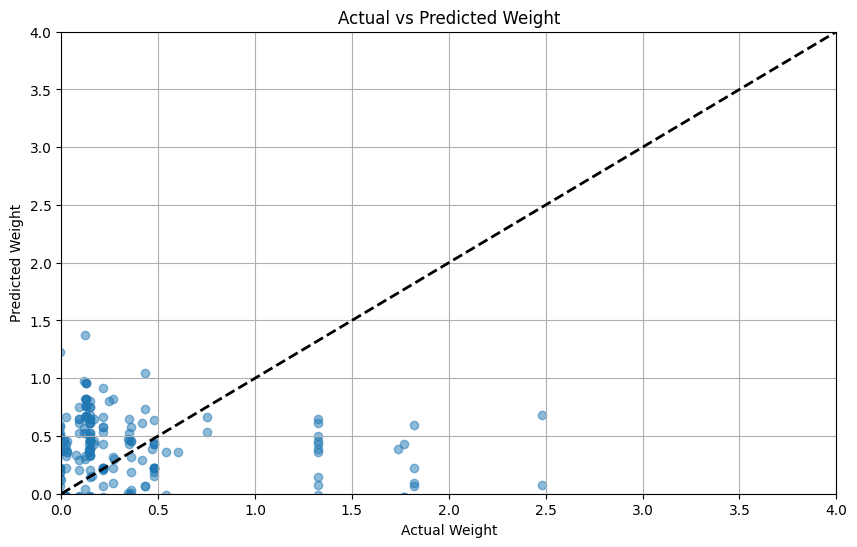

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test_numerical_numpy contains the actual target values
# and test_outputs_numpy contains the predicted values

# Plotting actual vs predicted for one of the properties (e.g., Weight)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_numerical_numpy[:, 0], test_outputs_numpy[:, 0], alpha=0.5)
plt.plot([y_test_numerical_numpy[:, 0].min(), y_test_numerical_numpy[:, 0].max()],
         [y_test_numerical_numpy[:, 0].min(), y_test_numerical_numpy[:, 0].max()],
         'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight')
plt.xlim(0,4)
plt.ylim(0,4)
plt.grid()
plt.show()
